### Ejercicio 26: Planificación de radioterapia en cáncer de próstata
Se desea optimizar el tratamiento con radioterapia de un paciente que sufre un tumor en el próstata. Para ello, se dispone de un equipo basado en la tecnología *Intensity Modulation Radiation Therapy*, que permite dividir la intensidad del tratamiento en diferentes rayos (R1 a R6) que inciden sobre diferentes zonas (Z1 a Z9).

Las unidades de intensidad de radiación son Gy (1 Gray equivale a J de energía depositada sobre 1 kg). La absorción de radiación recibida en cada zona depende de múltiples factores (naturaleza del tejido, cercanía a la fuente, ángulo de incidencia...). A modo de resumen, se facilitan las tasas de absorción (Gy recibidos/Gy incididos) de cada zona. 

Se quiere optimizar el tratamiento de forma que la zona Z8 correspondiente a la próstata (lugar donde esta el tumor) reciba la mayor cantidad posible de radiación. La potencia máxima de los diferentes rayos es de 80 Gy

Se conoce además que las zonas Z4 y Z7, correspondientes a las zonas en las que se encuentra el hueso púvico, son especialmente sensibles y se desea que no reciban más de 20 Gy de radiación. Por seguridad, es deseable que ninguna zona reciba más de 50 Gy. 

Determinar el tratamiento óptimo

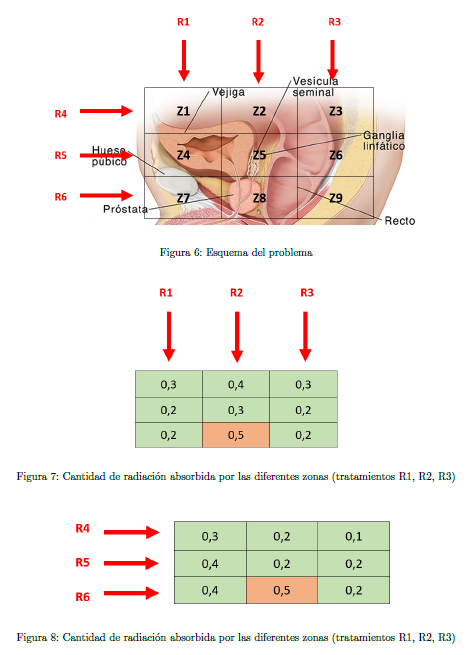

In [4]:
from IPython.display import Image 
Image(filename='img_enun/E26.png', width= 450)

In [ ]:
from pyomo.environ import *
model = ConcreteModel()

In [ ]:
model.Rvert = Set(initialize=range(3))
model.Rhor = Set(initialize=range(3))
model.x = Var(model.Rhor , model.Rvert, within=NonNegativeReals) #intensidad recibida por cada zona
model.Potv = Var(model.Rvert, within=NonNegativeReals) #potencia suministrada por cada rayo vertical
model.Poth = Var(model.Rhor, within=NonNegativeReals) #potencia suministrada por cada rayo horizontal

In [ ]:
model.Obj = Objective(expr=model.x[2,1],sense=maximize)

In [ ]:
import numpy as np
a123 = np.array([[0.3,0.4,0.3], [0.2,0.3,0.2], [0.2,0.5,0.2]])
a456 = np.array([[0.3,0.2,0.1], [0.4,0.2,0.2], [0.4,0.5,0.2]])


In [ ]:
model.xcalc = ConstraintList()
for i in model.Rhor:
    for j in model.Rvert:
        model.xcalc.add(
        model.x[i,j] == a123[i,j]*model.Potv[j]+a456[i,j]*model.Poth[i]
        )
        model.xcalc.add(
        model.x[i,j] <= 50
        )
model.max80h = ConstraintList()
for i in model.Rhor:
    model.max80h.add(
    model.Poth[i] <= 80    
    )
model.max80v = ConstraintList()
for j in model.Rvert:
    model.max80v.add(
    model.Potv[j] <= 80    
    )

model.Puv1 = Constraint(expr= model.x[1,0]<=20)
model.Puv2 = Constraint(expr= model.x[2,0]<=20)


In [ ]:
results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()  